In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor


In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
train_data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/data/main_dataset.csv')

In [26]:
train_data['Id'] = np.where(train_data['Id'] < 1e-18, 1e-18, train_data['Id'])
train_data['Log_Id'] = np.log10(train_data['Id'])

In [27]:
X = train_data[['Tox','Nc', 'Nd', 'Ns', 'Vds', 'Vgs']] # ignoring Nc
y = train_data['Log_Id']


poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, shuffle = True)

# model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42, n_jobs = -1)

model = BaggingRegressor(estimator=ExtraTreesRegressor(max_features='sqrt',  n_estimators=500, n_jobs = -1), n_estimators=5, random_state=42, n_jobs = -1)
model.fit(X_train, y_train)
# model2 = BaggingRegressor(estimator=ExtraTreesRegressor(n_estimators = 100, n_jobs = -1, random_state = 42 ), n_estimators = 5, random_state=42, n_jobs = -1)


BaggingRegressor(estimator=ExtraTreesRegressor(max_features='sqrt',
                                               n_estimators=500, n_jobs=-1),
                 n_estimators=5, n_jobs=-1, random_state=42)

In [29]:
# the above code eas execulted on google collab with TPU processor, since it is taking more than 1 hour to train the model in laptop
# importing the trained model
import joblib
# model = joblib.load('bagged-randomForest.joblib')
model.score(X_train, y_train)

0.9997904234992033

In [30]:
y_pred_1 = model.predict(X_test)
print(r2_score(y_pred_1, y_test))

0.9989872564127757


In [ ]:
# note :
# 1. Ignored - column - Tsi
# the train inputs are preprocesses with polynomail features (degree = 3, include_bias = False)
# train inputs are further processed StanderScaler
# while testing the test data - first preprocess the data by removing the values less than 1e-18
# preprocess - data with poly(which was fitted on to the train) and scaler (which wass fitted on train)

# model predicts the log(Id) value

In [32]:
# testing the model on the test data set
#  importing the testt data
test_data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/data/test_data.csv')


In [33]:
print(test_data[test_data['Vgs'] == 2].index.tolist())

[202, 405, 608, 811, 1014]


In [34]:
test_data = test_data.iloc[0:202]
print(test_data)

     Tsi  Tox            Ns            Nc            Nd  Vds       Vgs            Id
0     10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  0.000000  2.330000e-18
1     10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  0.002000  4.340000e-18
2     10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  0.005733  1.130000e-18
3     10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  0.012951  5.430000e-19
4     10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  0.022951  4.520000e-18
..   ...  ...           ...           ...           ...  ...       ...           ...
197   10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  1.952951  5.169600e-04
198   10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  1.962951  5.191940e-04
199   10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  1.972951  5.214020e-04
200   10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  1.982951  5.235830e-04
201   10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  1.9

In [35]:
test_data['Id'] = np.where(test_data['Id'] < 1e-18, 1e-18, test_data['Id'])
test_data['Log_Id'] = np.log10(test_data['Id'])

X_test_1 = test_data[[ 'Tox','Nc', 'Nd', 'Ns', 'Vds', 'Vgs']]
y_test_1 = test_data['Log_Id']

In [ ]:
X_test_1_transformed = poly.transform(X_test_1)
X_test_1_scaled = scaler.transform(X_test_1_transformed)

y_pred_test_1 = model.predict(X_test_1_scaled)
print("r2_score = ",r2_score(y_pred_test_1, y_test_1))
print("mean_absolute_error = ", mean_absolute_error(y_pred_test_1, y_test_1))

r2_score =  0.9942170674393306
mean_absolute_error =  0.1146550995057696


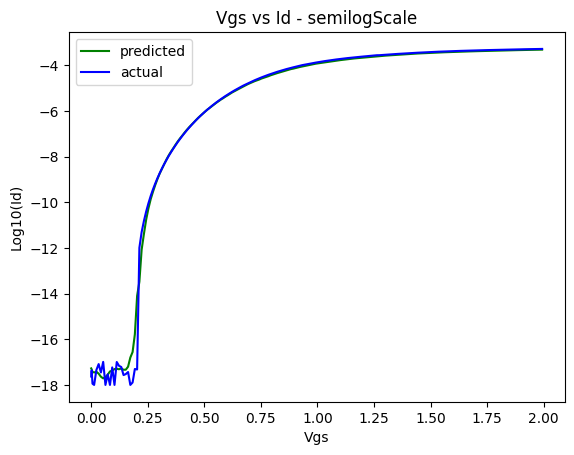

In [37]:
# plotting the data
plt.plot(X_test_1['Vgs'], y_pred_test_1, color = "green", label="predicted")
plt.plot(X_test_1['Vgs'], y_test_1, color = "blue", label="actual")
plt.title('Vgs vs Id - semilogScale')
plt.xlabel('Vgs')
plt.ylabel('Log10(Id)')
plt.legend()
plt.show()

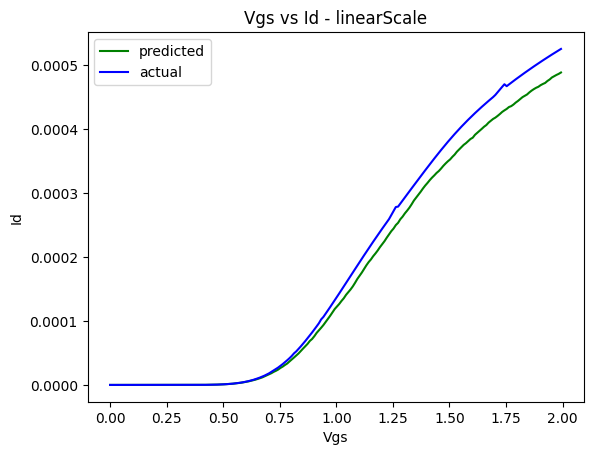

In [38]:
# plotting the data

plt.plot(X_test_1['Vgs'], np.maximum(np.power(10, y_pred_test_1), 1e-18), color = "green", label="predicted")
plt.plot(X_test_1['Vgs'], np.maximum(np.power(10, y_test_1), 1e-18), color = "blue", label="actual")
plt.title('Vgs vs Id - linearScale')
plt.xlabel('Vgs')
plt.ylabel('Id')
plt.legend()
plt.show()